# Importing Libraries

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Pandas and Numpy have been used for Data Manipulation and numerical Calculations

### Matplotlib and Seaborn have been used for Data visualizations

# Reading Data

### The dataset comes from the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning repository</a>, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from <a href = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'>here</a>.

In [351]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'

In [352]:
data = pd.read_csv(url)

In [353]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [354]:
data.shape

(41188, 21)

In [355]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Here we can observe that among 21 columns we dont have any missing values. 5 out of 21 columns are float, 6 out of 21 columns are Integers and  remaining 10 are object types

In [357]:
# Missing values 
data.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr_employed       0
euribor3m         0
cons_conf_idx     0
cons_price_idx    0
emp_var_rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

# Understanding Data 

This dataset contains information on clients of a bank who were contacted for a marketing campaign. The goal is to predict whether a client will subscribe to a term deposit offered by the bank. The following are the features (independent variables) in the dataset:

1. Age: The age of the client (numeric)

2. Job: The type of job of the client (categorical). It includes categories such as 'admin.', 'blue-collar', 'entrepreneur', 'management', etc.
3. Marital: The marital status of the client (categorical). It includes categories such as 'divorced', 'married', 'single', etc.
4. Education: The level of education of the client (categorical). It includes categories such as 'basic.4y', 'high.school', 'university.degree', etc.
5. Default: Whether the client has credit in default (categorical). It includes categories such as 'no', 'yes', 'unknown'.
6. Housing: Whether the client has a housing loan (categorical). It includes categories such as 'no', 'yes', 'unknown'.
7. Loan: Whether the client has a personal loan (categorical). It includes categories such as 'no', 'yes', 'unknown'.
8. Contact: The type of communication used to contact the client (categorical). It includes categories such as 'cellular', 'telephone'.
9. Month: The month in which the client was last contacted (categorical). It includes categories such as 'jan', 'feb', 'mar', etc.
10. Day_of_week: The day of the week on which the client was last contacted (categorical). It includes categories such as 'mon', 'tue', 'wed', etc.
11. Duration: The duration of the last contact in seconds (numeric). Note that this variable is highly correlated with the output variable and may not be available in a real-time scenario.
12. Campaign: The number of contacts performed during this campaign for this client (numeric).
13. Pdays: The number of days that passed by after the client was last contacted from a previous campaign (numeric). If the client was not previously contacted, the value is set to 999.
14. Previous: The number of contacts performed before this campaign for this client (numeric).
15. Poutcome: The outcome of the previous marketing campaign (categorical). It includes categories such as 'failure', 'success', 'nonexistent'.
16. Emp.var.rate: The quarterly indicator of the employment variation rate (numeric).
17. Cons.price.idx: The monthly indicator of the consumer price index (numeric).
18. Cons.conf.idx: The monthly indicator of the consumer confidence index (numeric).
19. Euribor3m: The daily indicator of the euribor 3-month rate (numeric).
20. Nr.employed: The quarterly indicator of the number of employees (numeric).

### The target variable (dependent variable) is:

21. Y: Whether the client subscribed to a term deposit (binary). It includes categories such as 'yes' and 'no'.

# Understanding Data with Pandas Profiling

In [358]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning and Wrangling

### The process of Data Cleaning/Wrangling involves addressing several issues that may arise within a dataset. These issues can include irrelevant or difficult to understand variable names, data entry errors, and incorrect data type assignments.

**Variable names**:
During the data collection process, variable names may be assigned without considering their relevance or how easy they are to understand. This can lead to confusion when analyzing the data. Data cleaning involves renaming variables to be more descriptive and intuitive to users.

**Data entry errors**:
Errors may occur when data is being entered into a database or spreadsheet. These errors can include typos, missing values, or data that does not fit within the expected range. Data cleaning involves identifying and correcting these errors to ensure data accuracy.

**Data type conversion**:
Data may be stored in an incorrect data type, making it difficult to perform calculations or analysis on the data. For example, a date field may be stored as text, making it impossible to sort by date. Data cleaning involves converting data to the appropriate data type to ensure accurate analysis.

Overall, data cleaning is an important step in the data analysis process as it helps to ensure that the data is accurate, consistent, and easy to work with.

## Variable Names

### All variable names have been assigned appropriate and accurate names, thus renaming them is unnecessary.

## Data Entry errors

### To find data entry errors in a DataFrame, we can use the following steps:

1. Identify the columns in the DataFrame that should contain specific types of data (e.g. numeric, string, date/time, etc.).
2. Use the .info() method to get a summary of the DataFrame's structure, including the data types and number of non-null values in each column.
3. Check for unexpected values in each column using the .unique() method. This can help identify spelling errors, inconsistent capitalization, or other typos in string columns.
4. Look for missing values using the .isna().sum() method. If a column has a large number of missing values, it may indicate a data entry error.
5. Check for outliers or unrealistic values in numeric columns using summary statistics such as the .describe() method or visualizations such as box plots.

#### By following these steps, we can identify potential data entry errors in our DataFrame and take steps to correct them.

In [359]:
columns = data.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [361]:
for i in columns:
    print(i)
    display(data[i].unique())

age


array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

job


array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

marital


array(['married', 'single', 'divorced', 'unknown'], dtype=object)

education


array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

default


array(['unknown', 'no', 'yes'], dtype=object)

housing


array(['yes', 'no', 'unknown'], dtype=object)

loan


array(['no', 'yes', 'unknown'], dtype=object)

contact


array(['cellular', 'telephone'], dtype=object)

month


array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

day_of_week


array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

duration


array([ 210,  138,  339, ..., 2260, 1662, 1490])

campaign


array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37])

pdays


array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27])

previous


array([0, 2, 1, 3, 4, 5, 7, 6])

poutcome


array(['nonexistent', 'success', 'failure'], dtype=object)

emp_var_rate


array([ 1.4, -0.1, -1.7, -1.8, -2.9,  1.1, -3.4, -1.1, -3. , -0.2])

cons_price_idx


array([93.444, 93.2  , 94.055, 93.075, 92.201, 93.918, 92.893, 92.963,
       93.994, 94.465, 93.798, 92.431, 92.649, 92.843, 92.469, 93.749,
       93.876, 94.027, 94.199, 94.601, 92.713, 94.767, 93.369, 94.215,
       92.379, 92.756])

cons_conf_idx


array([-36.1, -42. , -39.8, -47.1, -31.4, -42.7, -46.2, -40.8, -36.4,
       -41.8, -40.4, -26.9, -30.1, -50. , -33.6, -34.6, -40. , -38.3,
       -37.5, -49.5, -33. , -50.8, -34.8, -40.3, -29.8, -45.9])

euribor3m


array([4.963, 4.021, 0.729, 1.405, 0.869, 4.961, 1.327, 1.313, 1.266,
       1.41 , 4.864, 4.964, 4.965, 1.291, 4.96 , 4.962, 1.365, 4.86 ,
       4.967, 4.968, 1.344, 0.754, 1.299, 1.268, 1.334, 4.857, 0.715,
       4.966, 4.076, 1.354, 4.959, 4.958, 4.859, 1.27 , 4.856, 1.811,
       1.029, 1.259, 4.866, 0.883, 4.858, 1.56 , 0.74 , 4.245, 4.12 ,
       0.659, 1.415, 0.73 , 1.072, 4.153, 0.716, 0.682, 0.905, 1.281,
       4.865, 4.957, 0.914, 0.849, 0.876, 0.644, 4.855, 1.392, 1.25 ,
       0.873, 0.881, 0.942, 0.9  , 0.692, 1.244, 1.264, 4.191, 0.882,
       1.035, 0.742, 0.879, 1.032, 0.719, 5.   , 0.724, 4.97 , 0.646,
       1.26 , 1.479, 0.87 , 1.423, 1.498, 0.803, 0.714, 1.406, 0.702,
       0.827, 0.71 , 4.955, 0.653, 4.947, 0.835, 1.531, 0.735, 0.743,
       1.262, 0.944, 1.028, 0.663, 0.731, 0.699, 1.435, 1.538, 0.846,
       0.884, 1.453, 1.445, 0.635, 0.885, 0.854, 0.748, 0.643, 0.728,
       0.893, 0.861, 0.706, 1.025, 4.912, 0.668, 0.899, 1.085, 0.654,
       0.88 , 0.781,

nr_employed


array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3])

y


array([0, 1])

In [362]:
### Missing Values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

<AxesSubplot:>

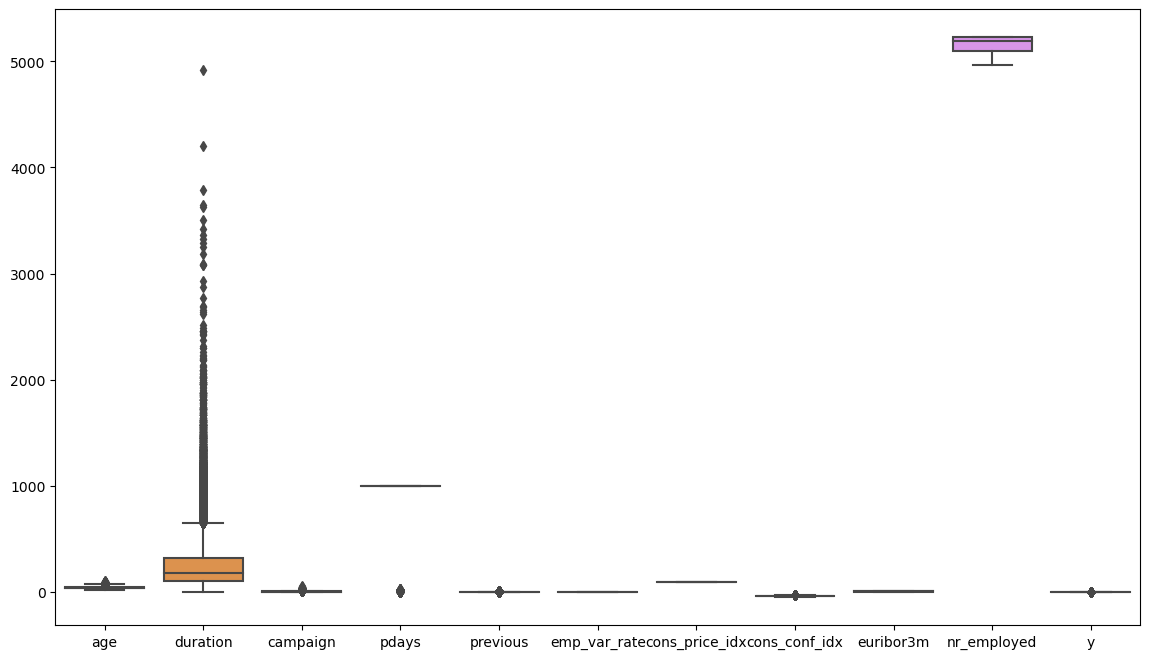

In [363]:
# Check summary statistics for numeric columns
print(data.describe())
plt.figure(figsize=(14, 8))
# Create box plots for numeric columns
sns.boxplot(data=data.select_dtypes(include=['float', 'int']))

### In above data we can see few outliers . To remove outliers from a DataFrame, we can use one of the following methods:

**Z-score method**: The Z-score method involves calculating the Z-score for each value in a given DataFrame and then removing any values with a Z-score greater than a predetermined threshold, which is typically 3.

**Interquartile range (IQR) method**: the Interquartile range (IQR) method involves calculating the IQR for each numeric column in the DataFrame and removing any values that fall outside a predetermined range, usually 1.5 times the IQR.

Both of these methods are used to remove rows that contain values considered to be outliers. It is possible to adjust the threshold or range as needed to control the number of outliers removed. It is important to note that removing outliers may result in a loss of information, so careful consideration is necessary to determine whether it is appropriate for the data analysis.

In [364]:
### Z-Score Method
from scipy import stats

# Select only the numeric columns in the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the Z-score for each value in the DataFrame
z_scores = stats.zscore(numeric_data)

# Remove rows with Z-score greater than 3
z_score_df = data[(z_scores < 3).all(axis=1)]


                age      duration      campaign         pdays      previous  \
count  38123.000000  38123.000000  38123.000000  38123.000000  38123.000000   
mean      39.671012    234.653149      2.284658    977.928363      0.114839   
std        9.697337    191.144473      1.729997    143.109692      0.318831   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    176.000000      2.000000    999.000000      0.000000   
75%       47.000000    305.000000      3.000000    999.000000      0.000000   
max       71.000000   1036.000000     10.000000    999.000000      1.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  38123.000000    38123.000000   38123.000000  38123.000000   
mean       0.132553       93.572991     -40.570409      3.690364   
std        1.543653        0.569219       4.540197      1.695253   
min       -3.400

<AxesSubplot:>

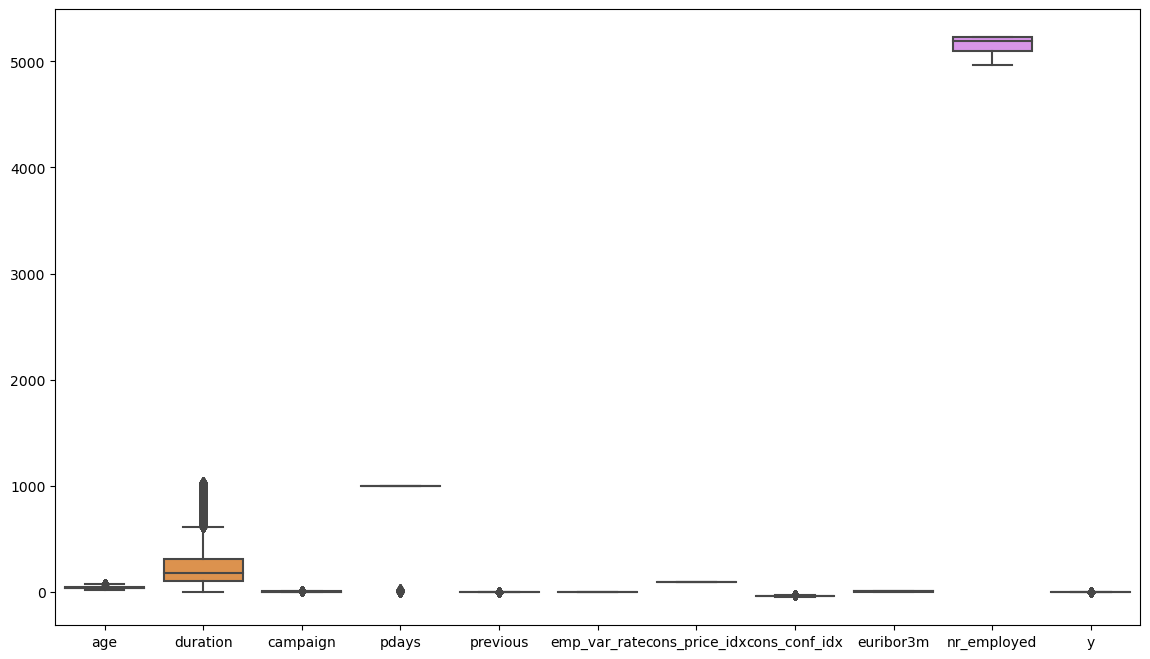

In [365]:
print(z_score_df.describe())
plt.figure(figsize=(14, 8))
# Create box plots for numeric columns
sns.boxplot(data=z_score_df.select_dtypes(include=['float', 'int']))

                age      duration      campaign    pdays  previous  \
count  28705.000000  28705.000000  28705.000000  28705.0   28705.0   
mean      39.737816    196.177077      2.094618    999.0       0.0   
std        9.352808    133.838636      1.308538      0.0       0.0   
min       18.000000      0.000000      1.000000    999.0       0.0   
25%       32.000000     96.000000      1.000000    999.0       0.0   
50%       38.000000    161.000000      2.000000    999.0       0.0   
75%       47.000000    263.000000      3.000000    999.0       0.0   
max       69.000000    644.000000      6.000000    999.0       0.0   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  28705.000000    28705.000000   28705.000000  28705.000000   
mean       0.492716       93.670108     -40.378276      4.083102   
std        1.341634        0.524020       4.036376      1.476729   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -0.100000       93.

<AxesSubplot:>

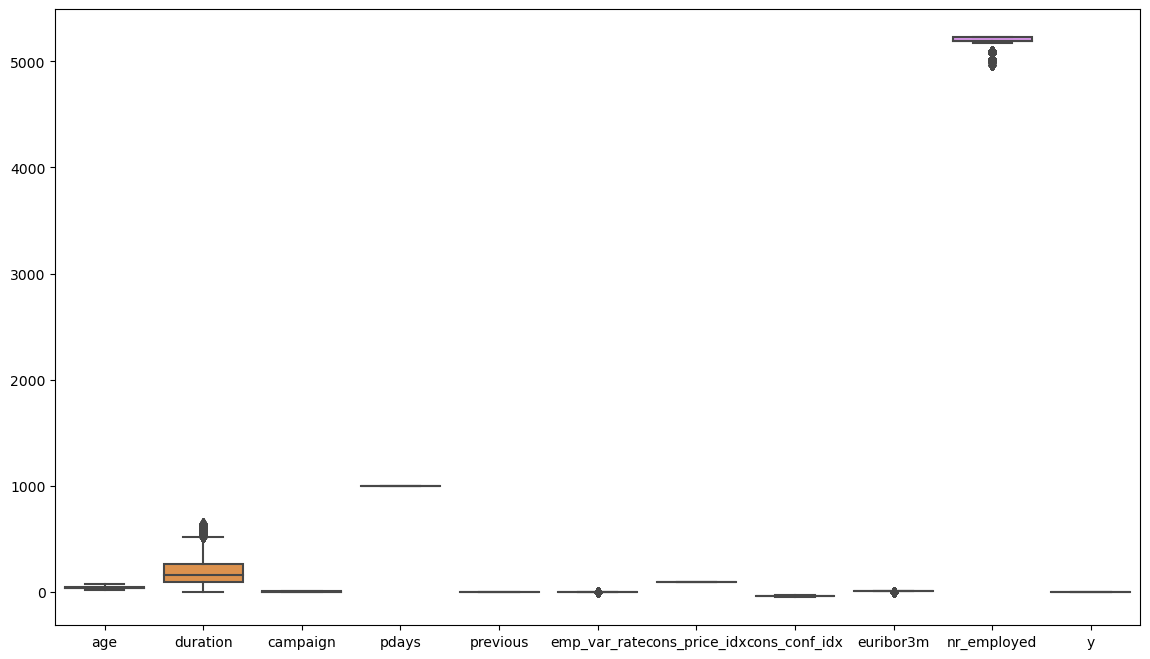

In [366]:
### Interquartile range (IQR) method
numeric_data = data.select_dtypes(include=[np.number])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Remove rows with values outside the IQR range
IQR_df = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR_df.describe())
plt.figure(figsize=(14, 8))
# Create box plots for numeric columns
sns.boxplot(data=IQR_df.select_dtypes(include=['float', 'int']))

### After Applying the Interquartile range (IQR) method few columns are reduced to single values which is irrelevent. so we are not considering it.

In [367]:
z_score_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [368]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [369]:
data.shape

(41188, 21)

In [370]:
### Using the Z-score method to remove outliers, the dataset was reduced to 38,123 rows.

# EDA -Exploratory Data Analysis

<AxesSubplot:>

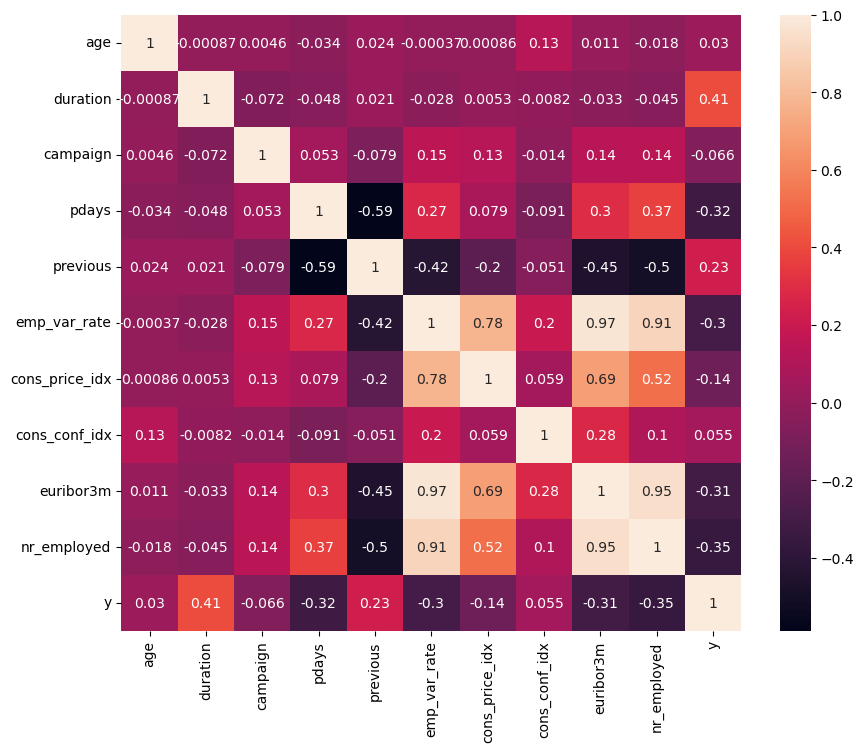

In [371]:
# # Plot a histogram of the 'age' column
# sns.histplot(data['age'], bins=20)

# # Plot a box plot of the 'duration' column
# sns.boxplot(data['duration'])

# Plot a correlation heatmap of numeric columns
plt.figure(figsize=(10, 8))
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]
sns.heatmap(numeric_data.corr(), annot=True)



# # Plot a pair plot of a subset of columns
# sns.pairplot(data[['age', 'duration', 'campaign', 'y']])


### The high correlation between emp_var_rate, cons_price_idx, euribor3m, and nr_employed indicates redundancy in the system. To reduce this redundancy, it may be appropriate to remove cons_price_idx, euribor3m, and nr_employed.

In [372]:
data.drop(['cons_price_idx','euribor3m','nr_employed'],axis = 1, inplace = True)

## The correlation matrix following the removal of redundant features.

<AxesSubplot:>

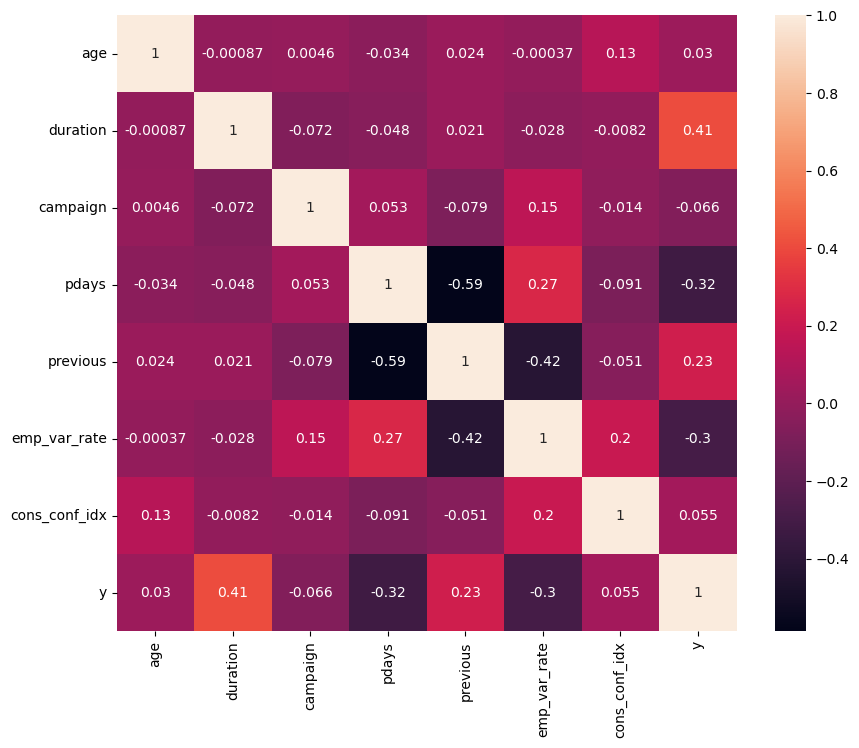

In [373]:
# # Plot a histogram of the 'age' column
# sns.histplot(data['age'], bins=20)

# # Plot a box plot of the 'duration' column
# sns.boxplot(data['duration'])

# Plot a correlation heatmap of numeric columns
plt.figure(figsize=(10, 8))
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]
sns.heatmap(numeric_data.corr(), annot=True)



# # Plot a pair plot of a subset of columns
# sns.pairplot(data[['age', 'duration', 'campaign', 'y']])

## Statistics Summary

The data description offers a concise and straightforward overview of the data, encompassing statistical measures such as Count, Mean, Standard Deviation, Median, Mode, Minimum and Maximum values, Range, Standard Deviation, etc. The statistical summary aids in identifying potential outliers, data input errors, and data distribution patterns, such as normal distribution or skewed distribution.

In Python, this task can be accomplished using the 'describe()' function, which generates a comprehensive statistical summary of the data. Specifically, the 'describe()' function is used for numerical data types, such as 'int' or 'float'. Furthermore, to obtain a transposed output, 'data.describe().T' can be implemented.

In [374]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.0,32.0,38.0,47.0,98.0
duration,41188.0,258.285010,259.279249,0.0,102.0,180.0,319.0,4918.0
campaign,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
pdays,41188.0,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0
previous,41188.0,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0
emp_var_rate,41188.0,0.081886,1.570960,-3.4,-1.8,1.1,1.4,1.4
cons_conf_idx,41188.0,-40.502600,4.628198,-50.8,-42.7,-41.8,-36.4,-26.9
y,41188.0,0.112654,0.316173,0.0,0.0,0.0,0.0,1.0


## EDA Univariate Analysis

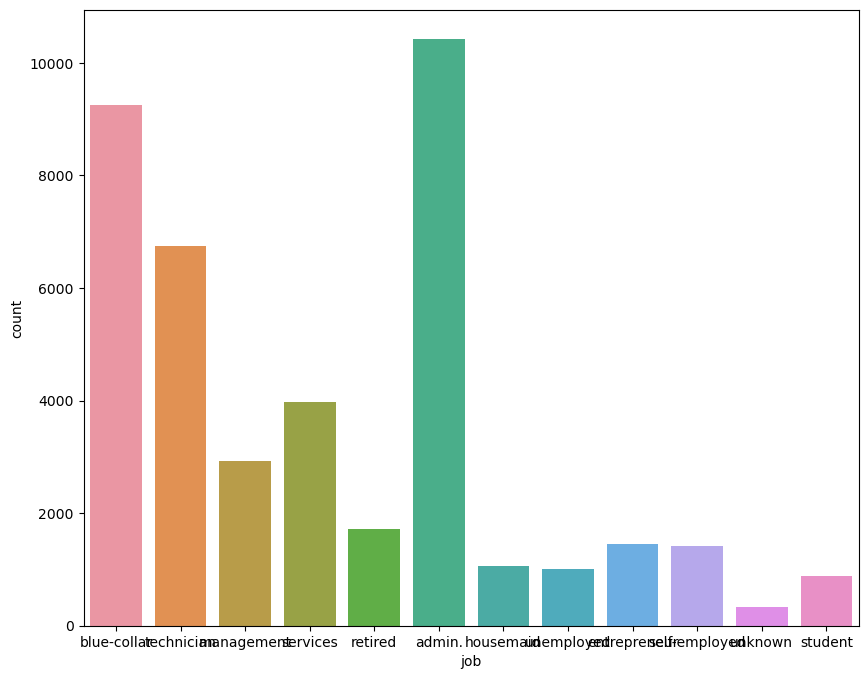

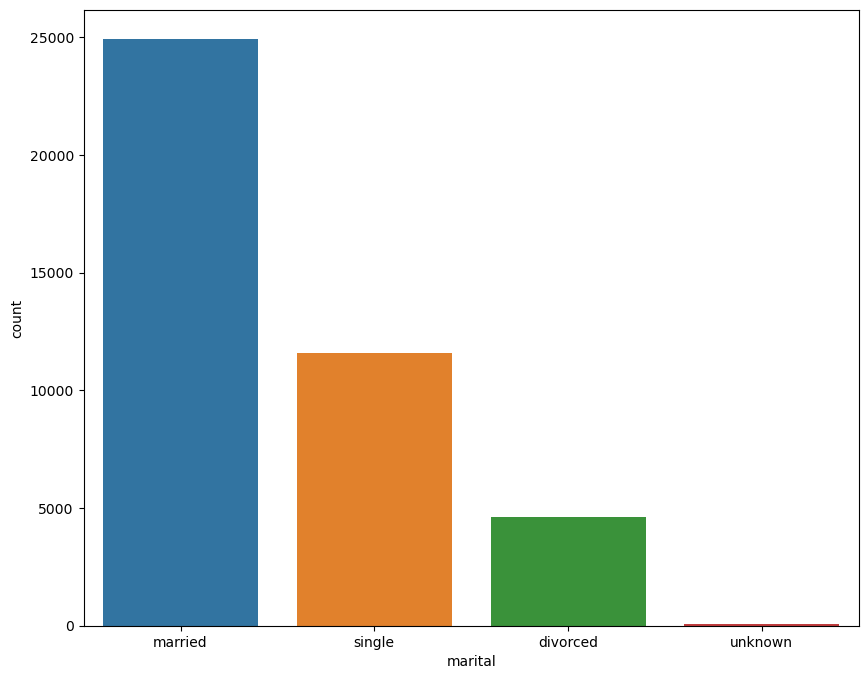

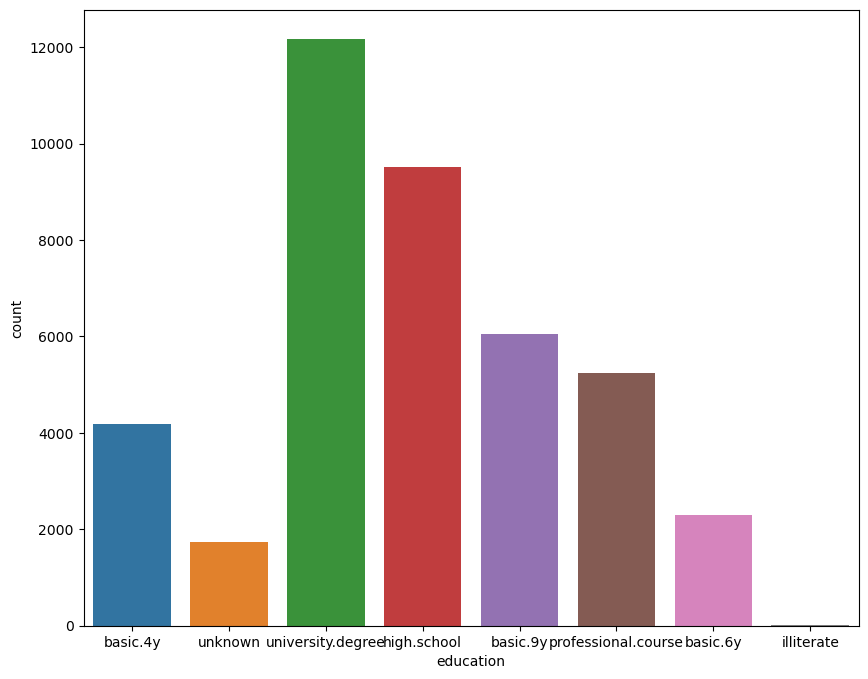

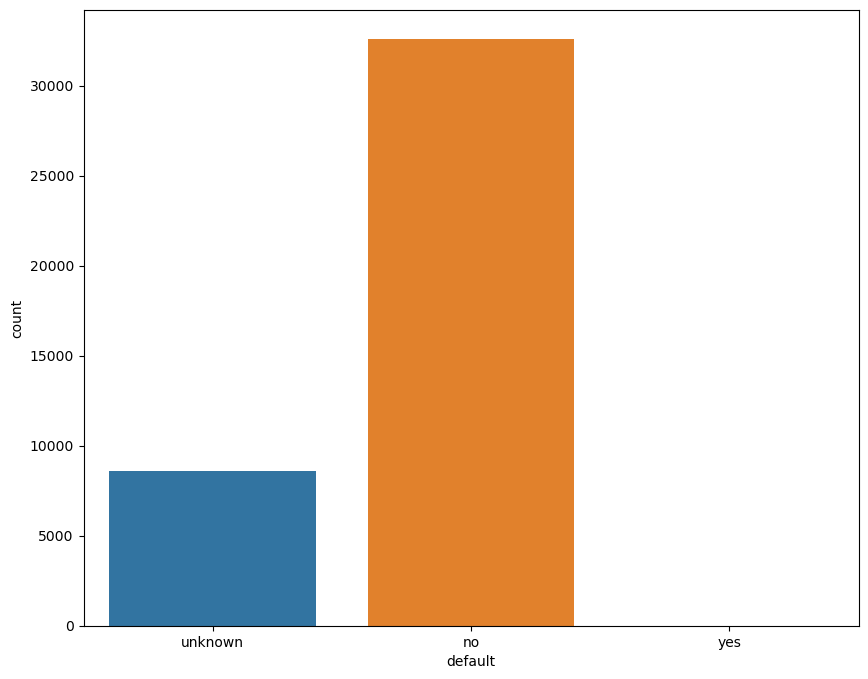

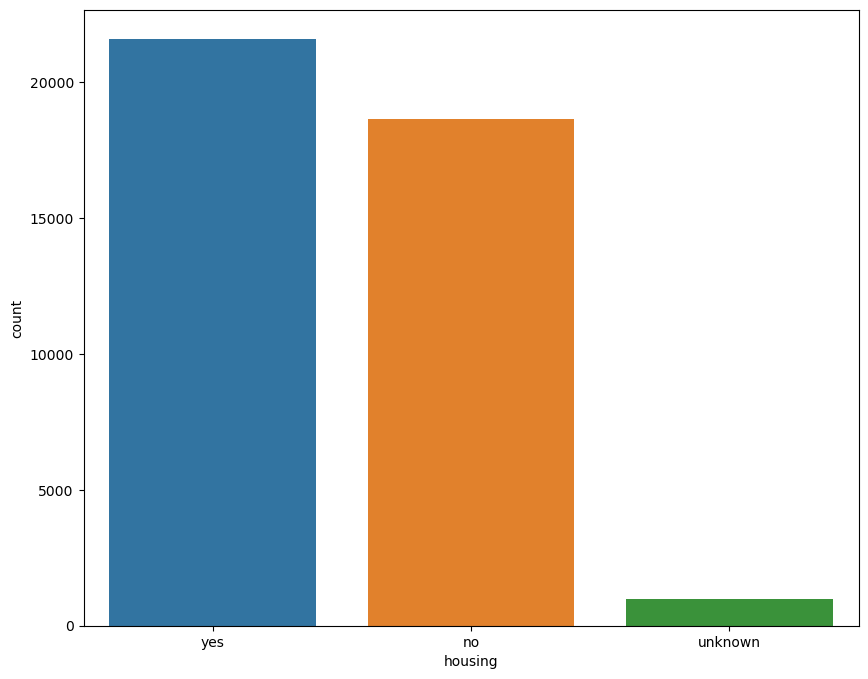

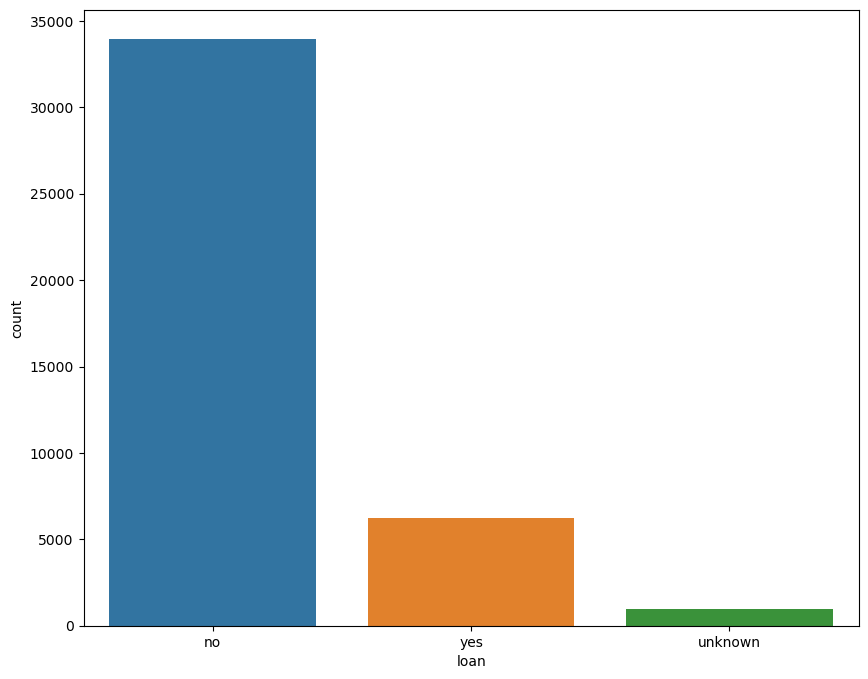

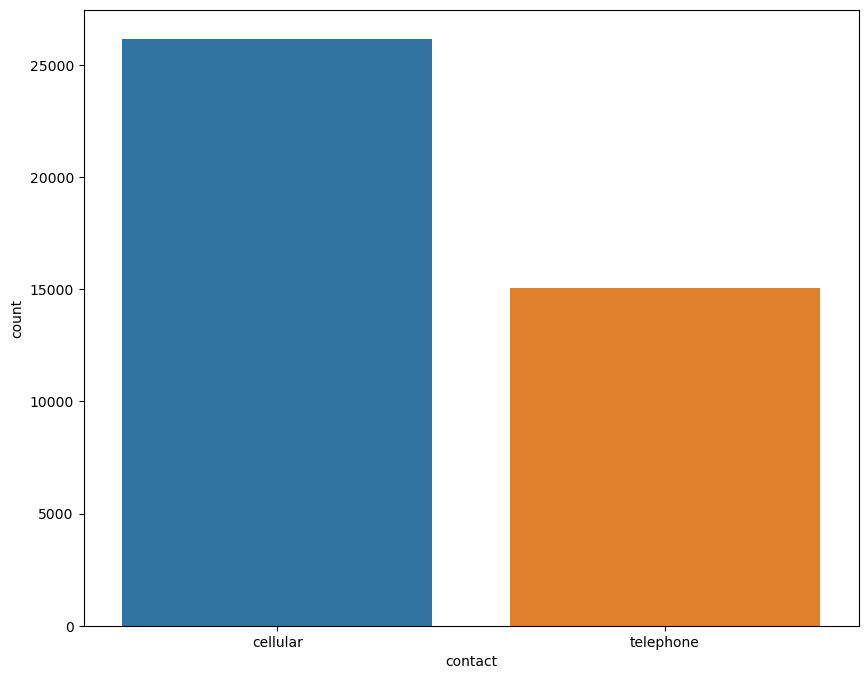

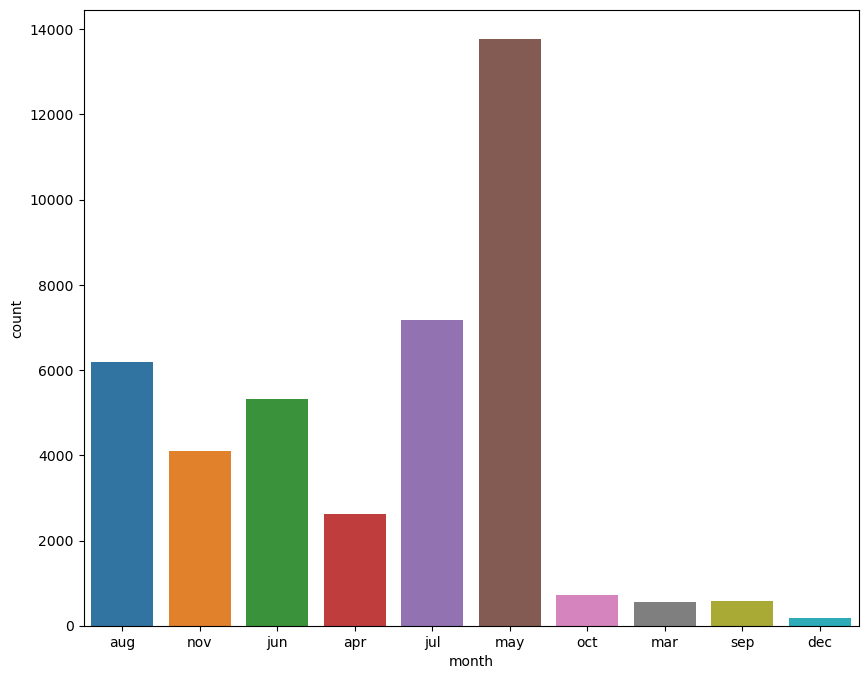

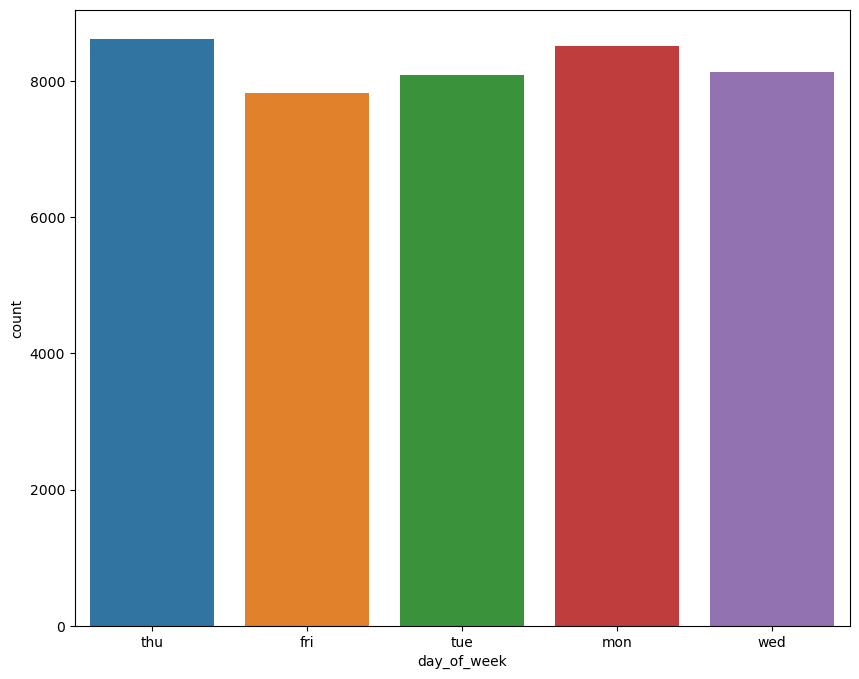

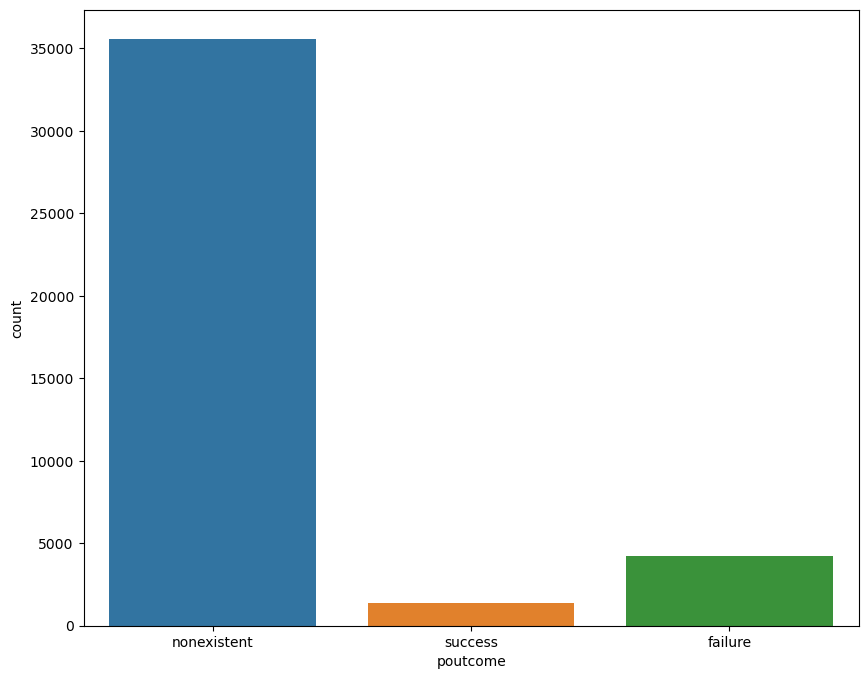

In [375]:
# select columns with categorical and object data types
cat_cols = list(data.select_dtypes(include=['category', 'object']).columns)

# select columns with numerical data types
num_cols = list(data.select_dtypes(include=['int', 'float']).columns)

# plot each categorical variable
for col in cat_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=col, data=data)
   


# Plot each categorical variable

### To improve the readability of the output graphs, I am printing them separately to allow for better visualization.

<AxesSubplot:xlabel='job', ylabel='count'>

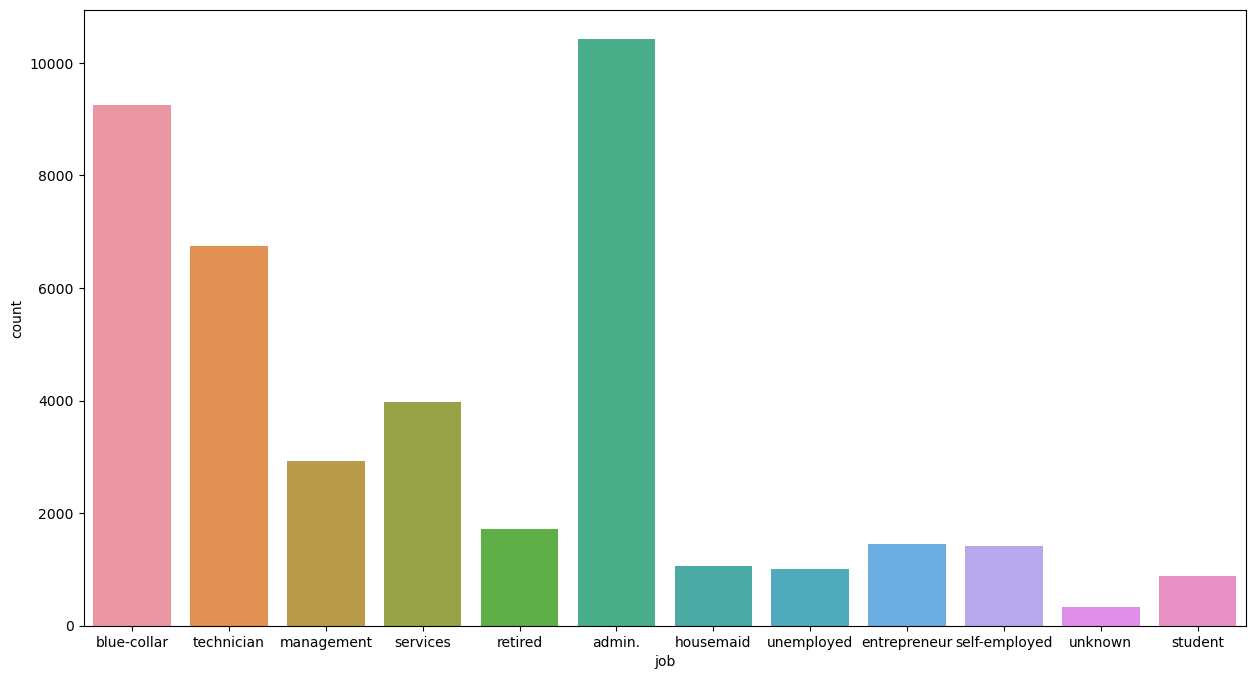

In [376]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[0], data=data)

<AxesSubplot:xlabel='marital', ylabel='count'>

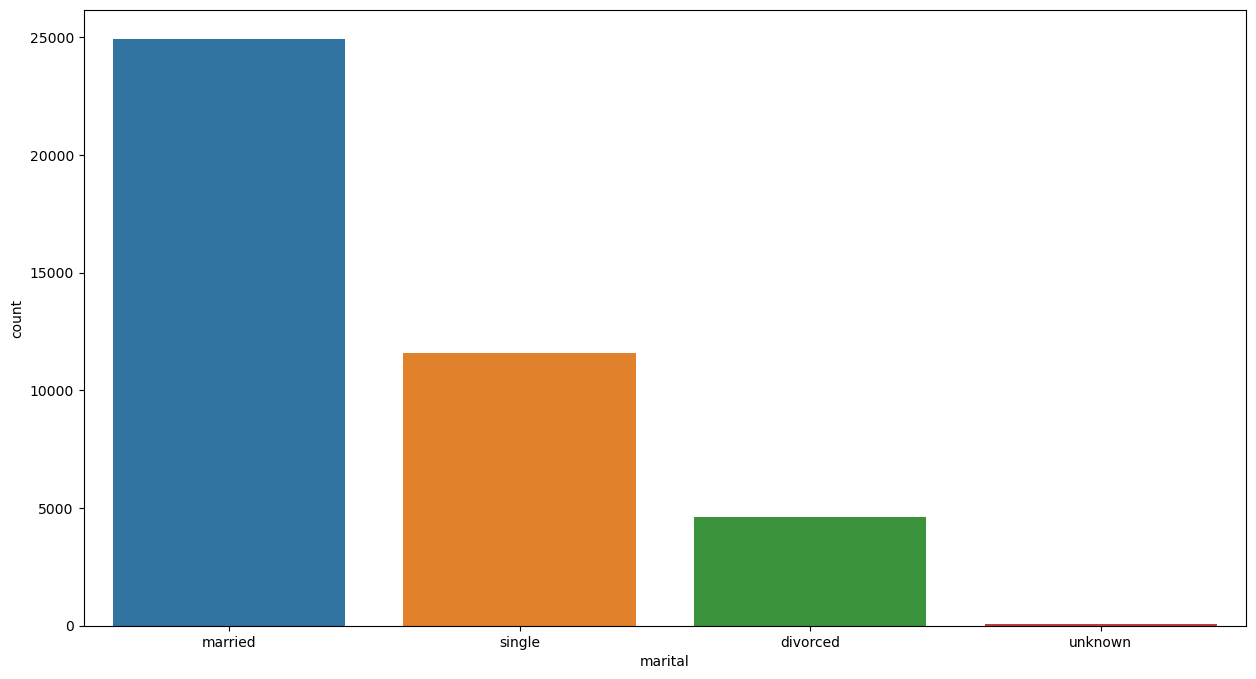

In [377]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[1], data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

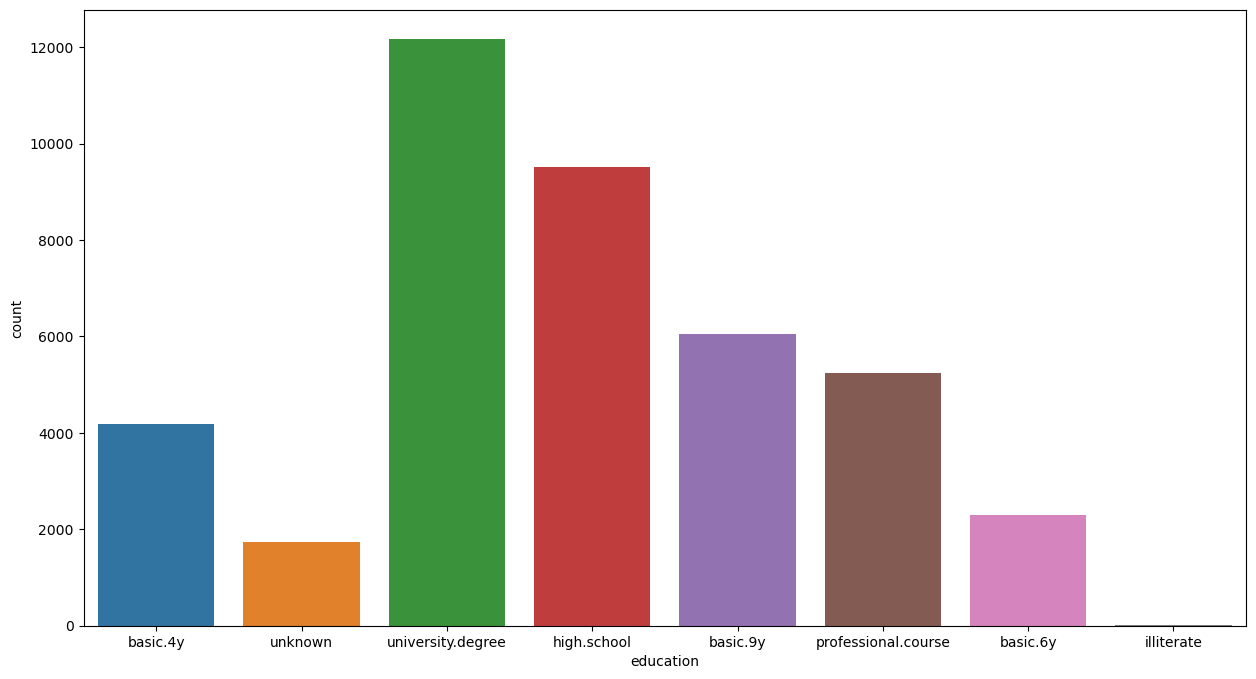

In [378]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[2], data=data)

<AxesSubplot:xlabel='housing', ylabel='count'>

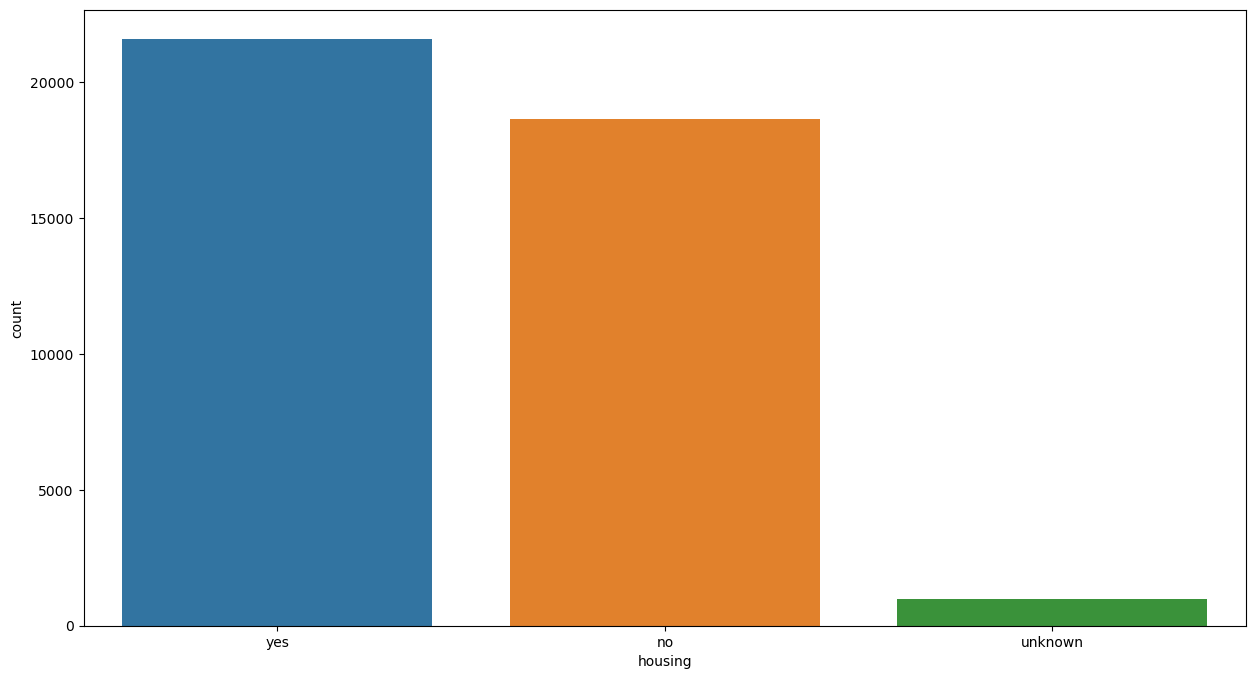

In [379]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[4], data=data)

<AxesSubplot:xlabel='loan', ylabel='count'>

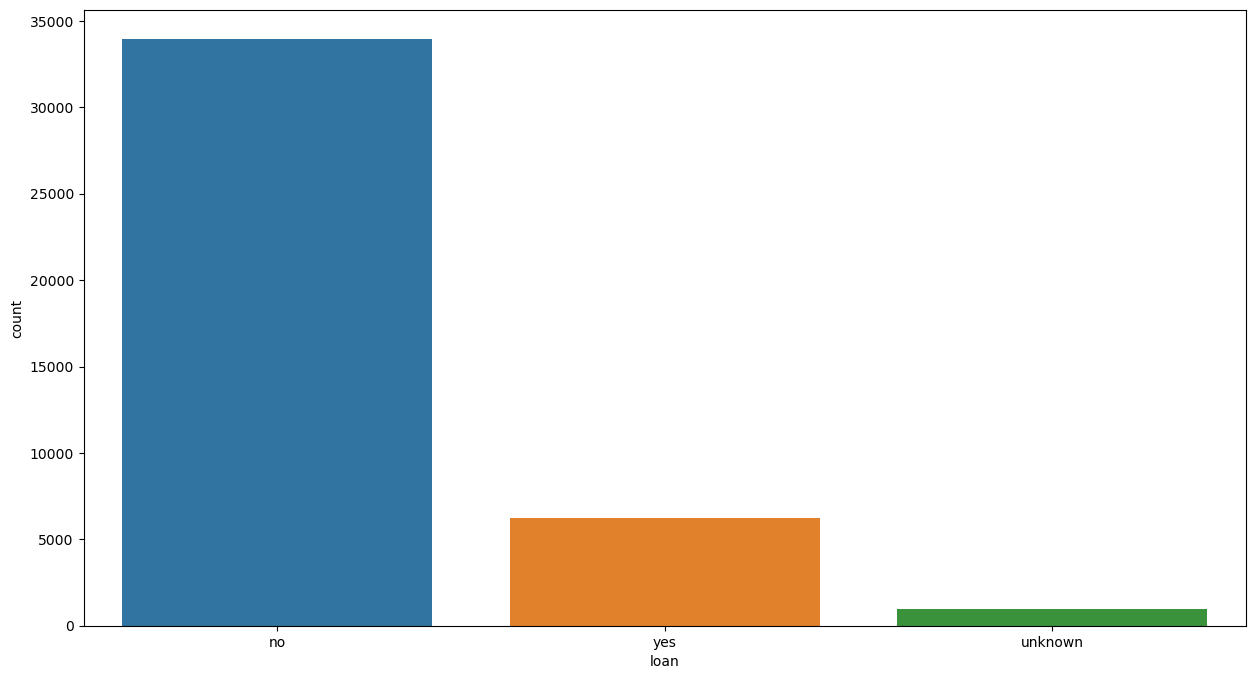

In [380]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[5], data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

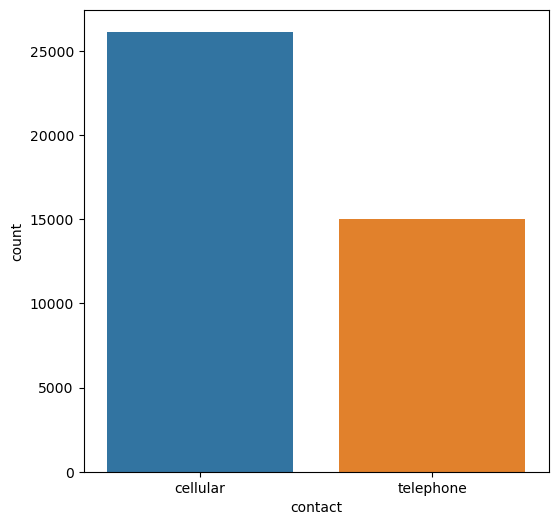

In [381]:
plt.figure(figsize=(6, 6))
sns.countplot(x=cat_cols[6], data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

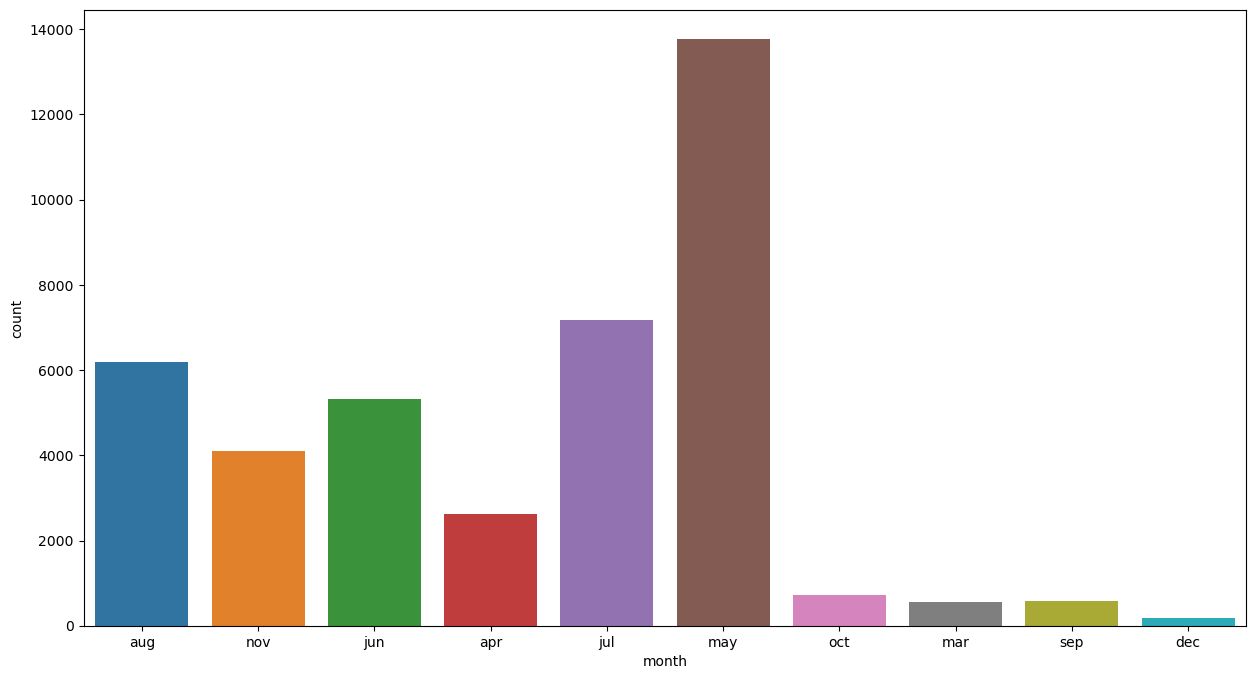

In [382]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[7], data=data)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

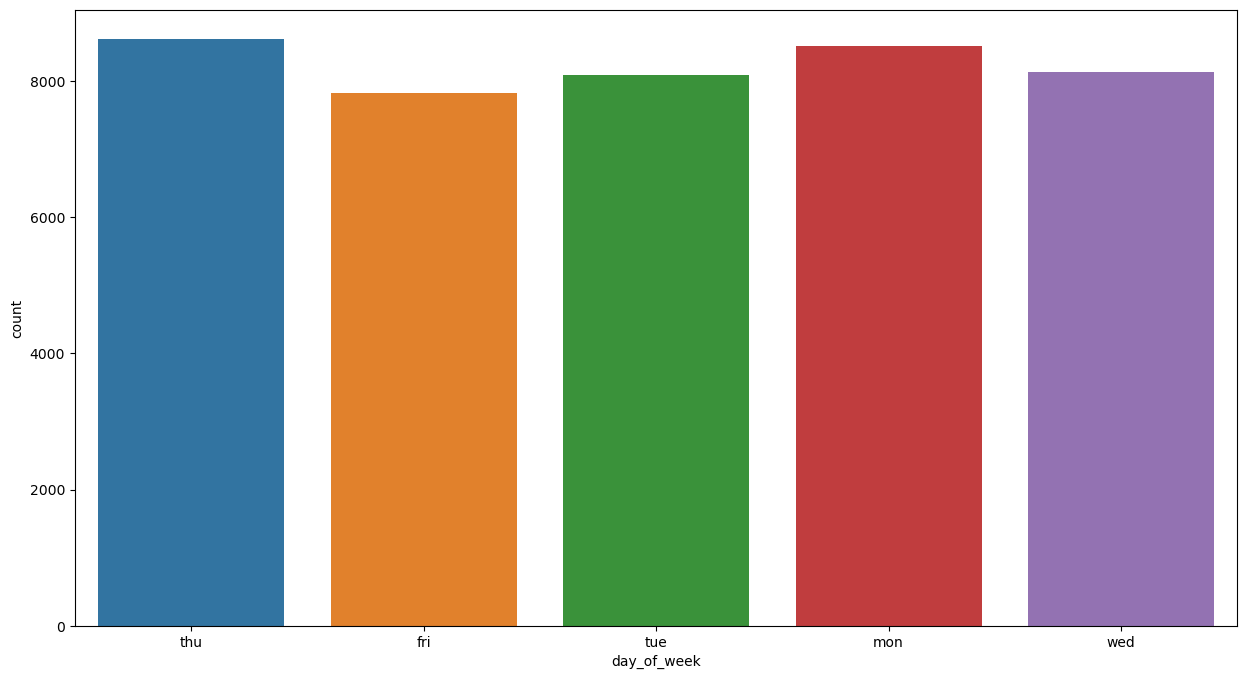

In [383]:
plt.figure(figsize=(15, 8))
sns.countplot(x=cat_cols[8], data=data)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

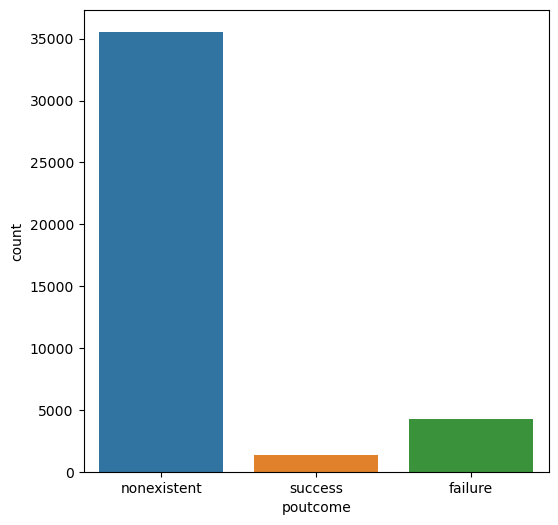

In [384]:
plt.figure(figsize=(6, 6))
sns.countplot(x=cat_cols[9], data=data)

# plot each numerical variable

<Figure size 1200x1000 with 0 Axes>

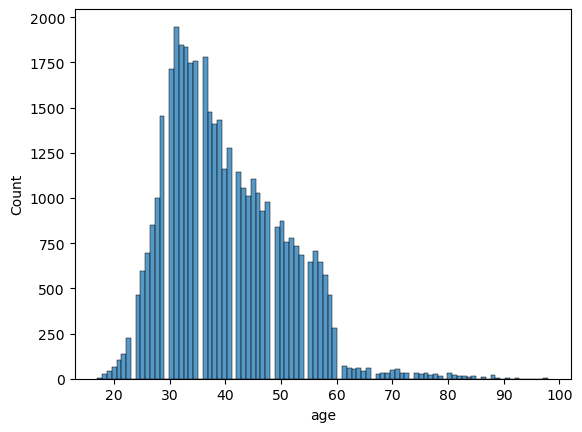

<Figure size 1200x1000 with 0 Axes>

In [385]:
sns.histplot(x=num_cols[0], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

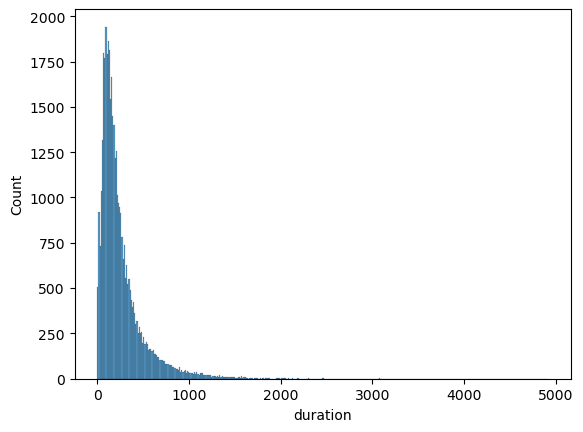

<Figure size 1200x1000 with 0 Axes>

In [386]:
sns.histplot(x=num_cols[1], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

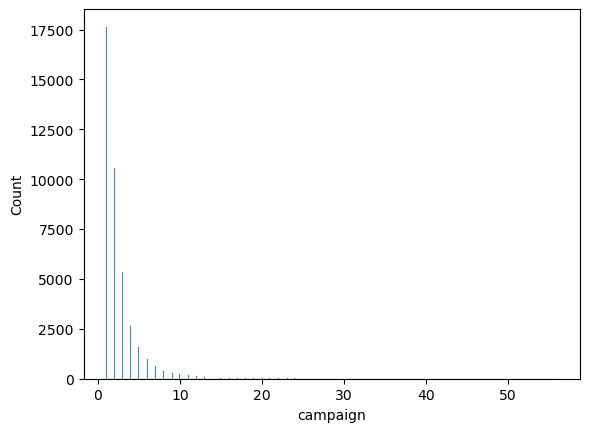

<Figure size 1200x1000 with 0 Axes>

In [387]:
sns.histplot(x=num_cols[2], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

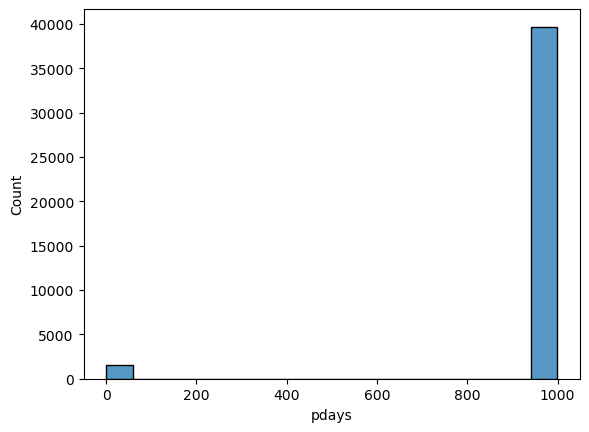

<Figure size 1200x1000 with 0 Axes>

In [388]:
sns.histplot(x=num_cols[3], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

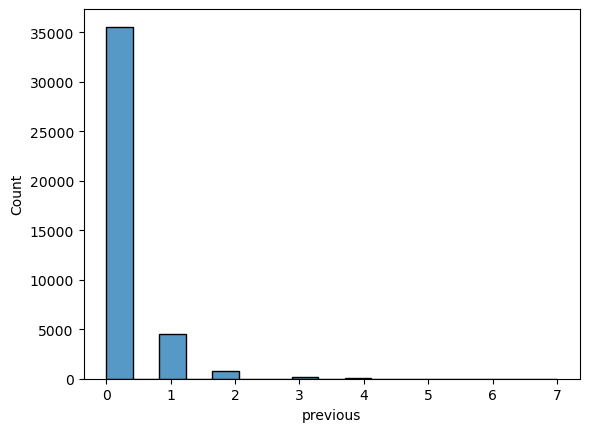

<Figure size 1200x1000 with 0 Axes>

In [389]:
sns.histplot(x=num_cols[4], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

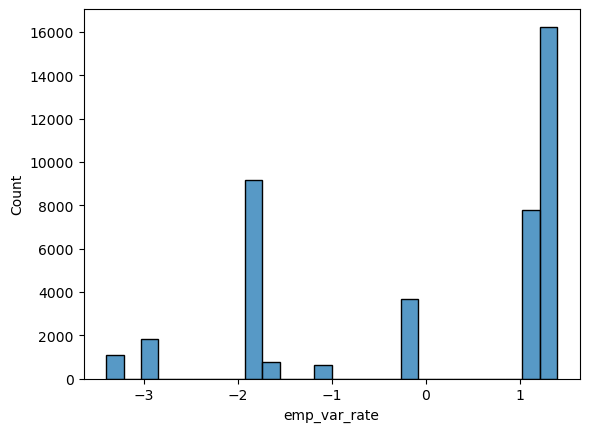

<Figure size 1200x1000 with 0 Axes>

In [390]:
sns.histplot(x=num_cols[5], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

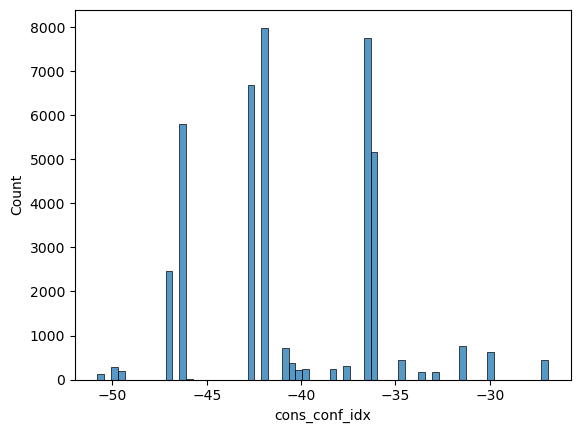

<Figure size 1200x1000 with 0 Axes>

In [391]:
sns.histplot(x=num_cols[6], data=data)
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

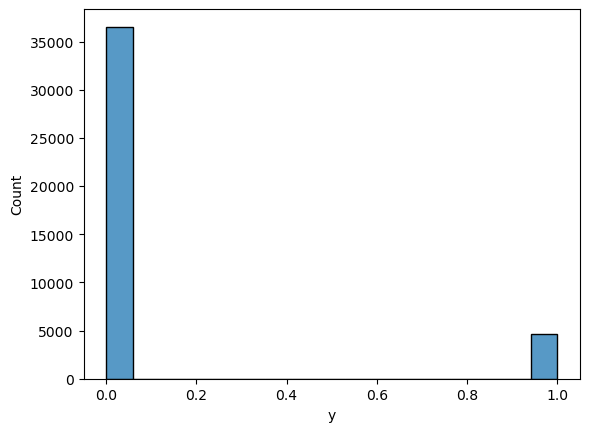

<Figure size 1200x1000 with 0 Axes>

In [392]:
sns.histplot(x=num_cols[7], data=data)
plt.figure(figsize=(12, 10))

## Data Transformation

### Identifying  the variables with a high skewness value (above 0.5 or 1) as potential candidates for log transformation:

In [393]:
skewness = data[num_cols[:len(num_cols)-1]].skew()
skew_vars = skewness[abs(skewness) > 0.5].index
print(skew_vars)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate'], dtype='object')


### Apply log transformation to the selected variables:

In [394]:
data[skew_vars] = np.log1p(data[skew_vars])

### The np.log1p() function is used instead of np.log() to avoid issues with zero and negative values. Also, it's important to keep in mind that log transformation can only be applied to positive values.

In [395]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_conf_idx,y
0,3.806662,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,5.351858,0.693147,6.907755,0.000000,nonexistent,0.875469,-36.1,0
1,3.988984,technician,married,unknown,no,no,no,cellular,nov,fri,4.934474,0.693147,6.907755,0.000000,nonexistent,-0.105361,-42.0,0
2,3.367296,management,single,university.degree,no,yes,no,cellular,jun,thu,5.828946,1.386294,1.945910,1.098612,success,NaN,-39.8,1
3,3.688879,services,married,high.school,no,no,no,cellular,apr,fri,5.225747,1.098612,6.907755,0.000000,nonexistent,NaN,-47.1,0
4,4.025352,retired,married,basic.4y,no,yes,no,cellular,aug,fri,4.927254,0.693147,1.386294,0.693147,success,NaN,-31.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.094345,retired,married,high.school,unknown,no,yes,telephone,jun,thu,5.407172,0.693147,6.907755,0.000000,nonexistent,0.875469,-41.8,0
41184,3.465736,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,5.283204,1.098612,6.907755,0.000000,nonexistent,0.741937,-36.4,0
41185,3.761200,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,4.143135,1.386294,6.907755,0.000000,nonexistent,0.741937,-36.4,0
41186,3.891820,technician,married,professional.course,no,no,yes,telephone,oct,tue,5.303305,1.098612,6.907755,0.000000,nonexistent,NaN,-26.9,0


## EDA Bivariate Analysis

<Figure size 100000x500000 with 0 Axes>

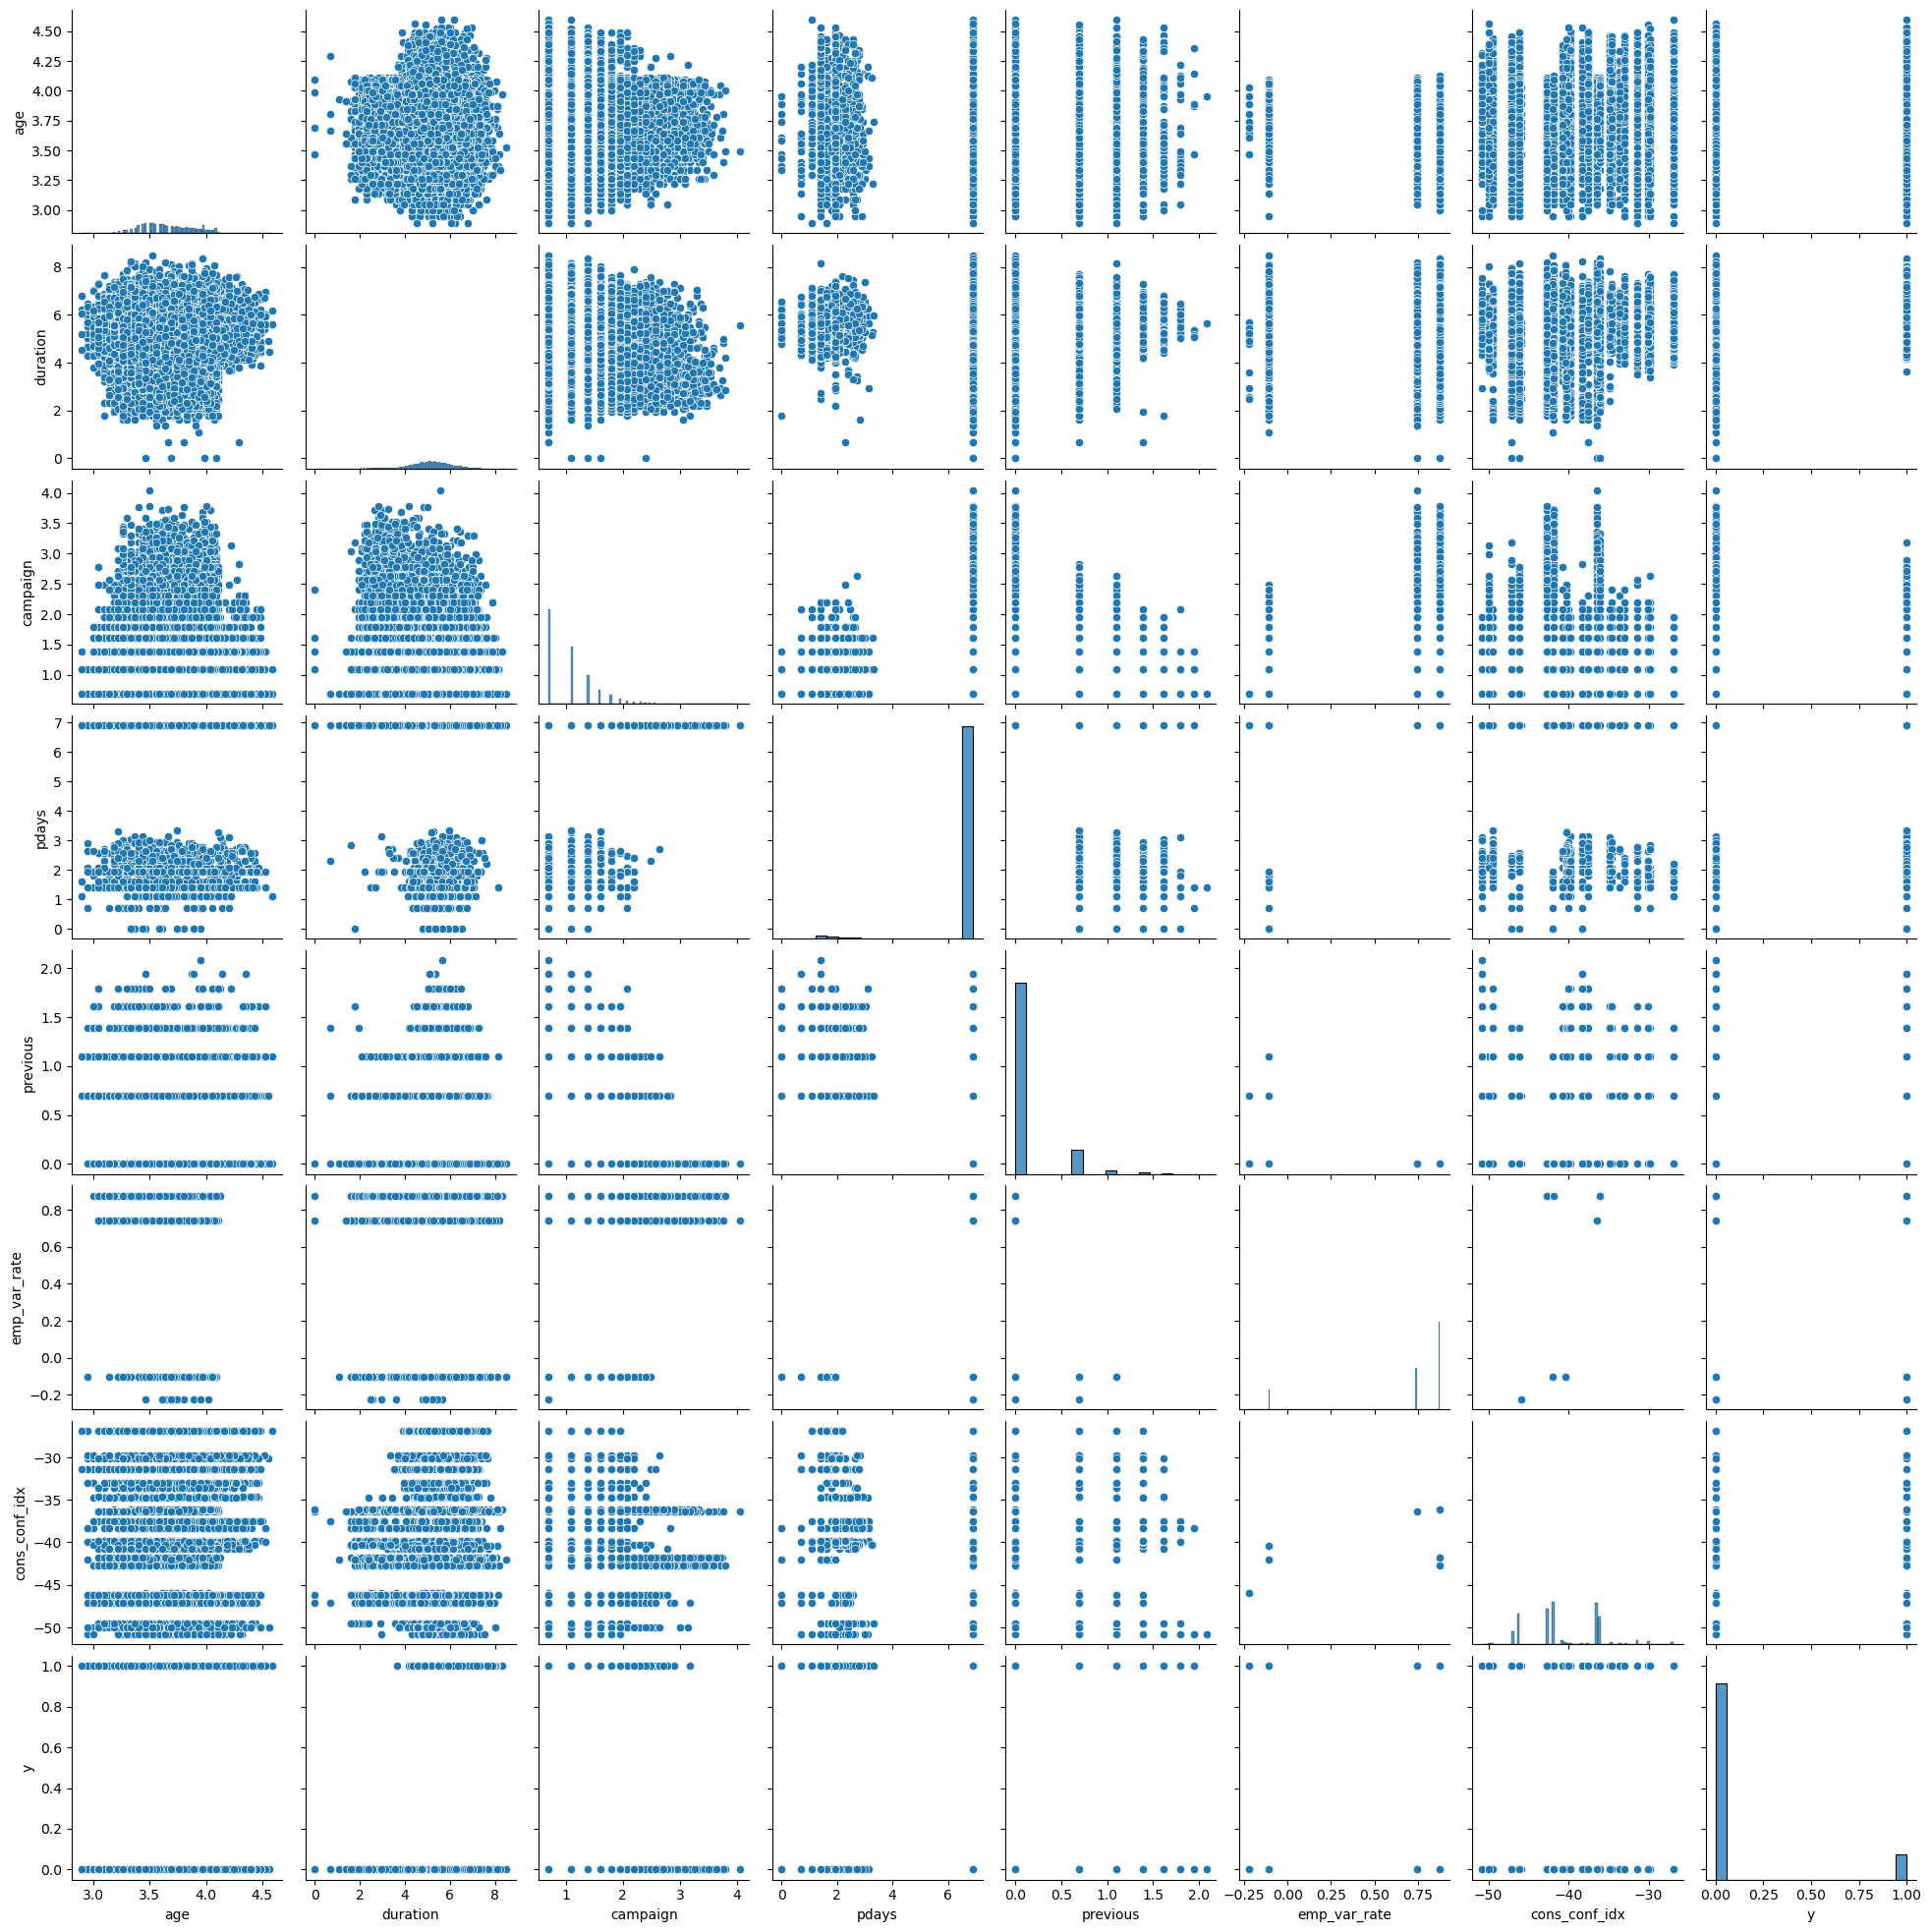

<Figure size 100000x500000 with 0 Axes>

In [396]:
# create pair plot for numerical variables
sns.pairplot(data, vars=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_conf_idx', 'y'])
plt.figure(figsize = (1000,5000))

In [397]:
# # Bivariate analysis for categorical variables using Stacked bar chart or Bar plots

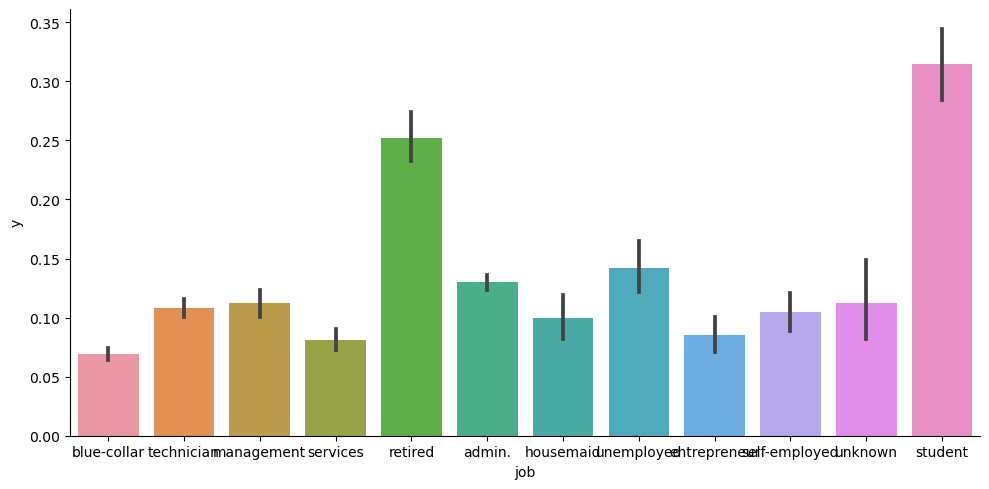

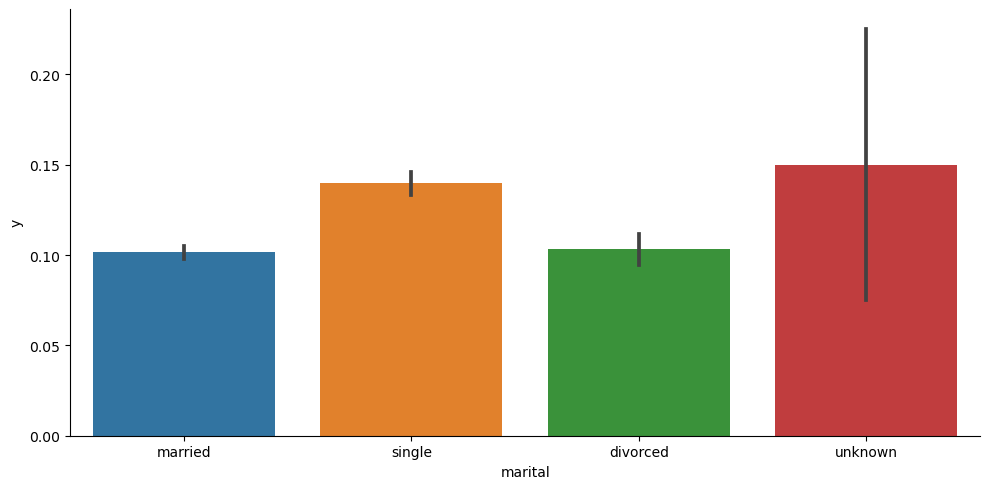

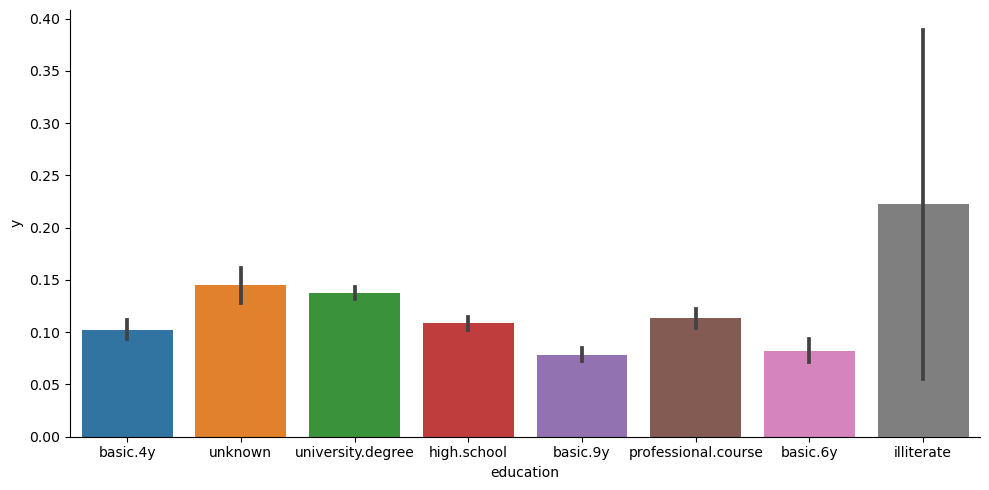

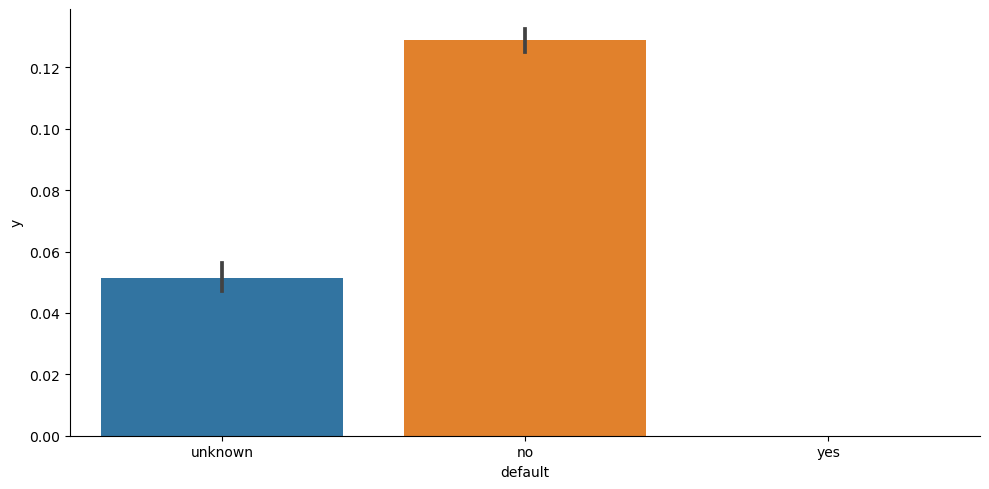

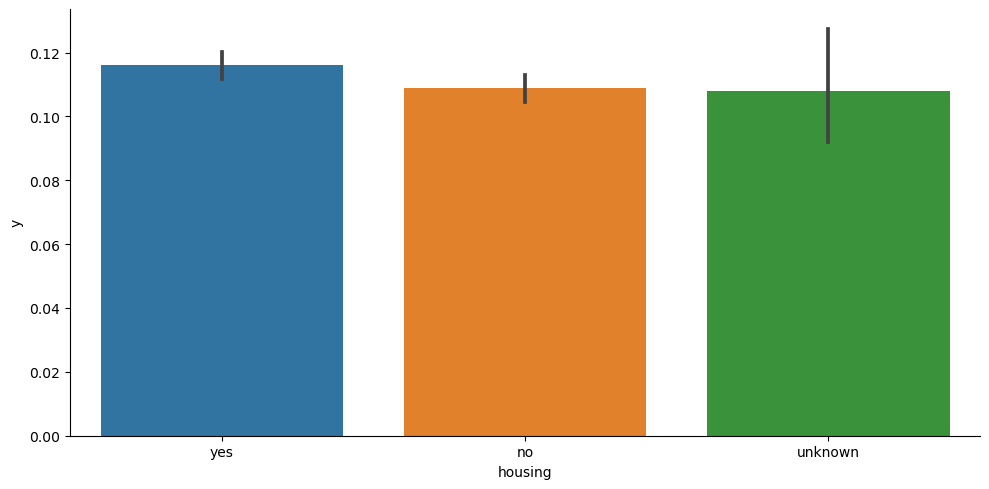

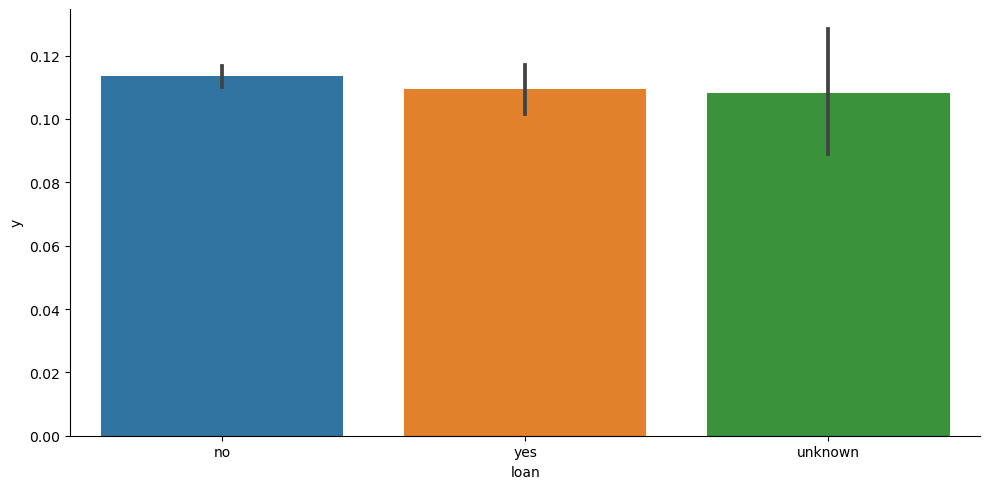

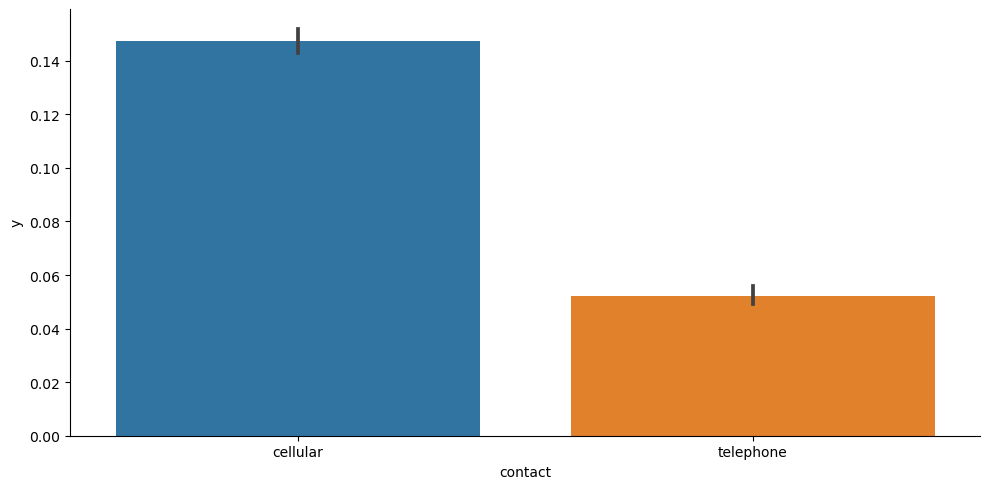

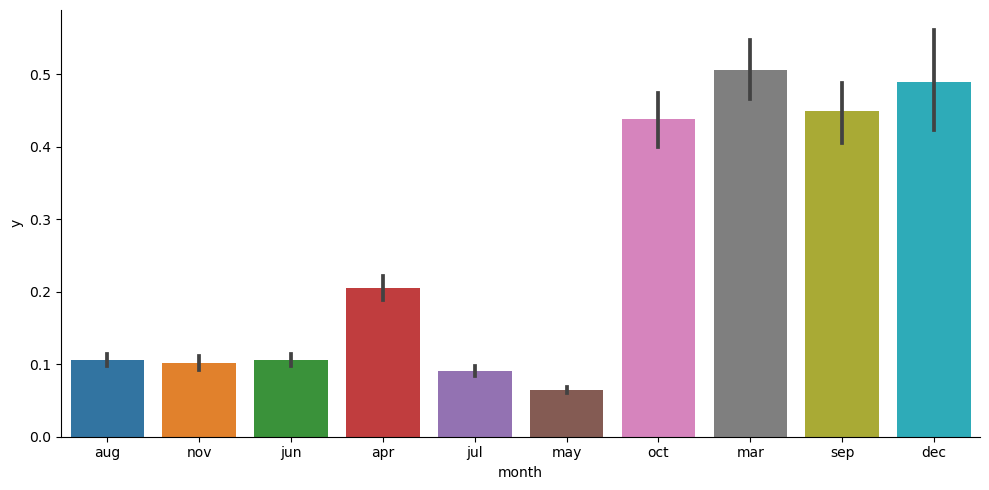

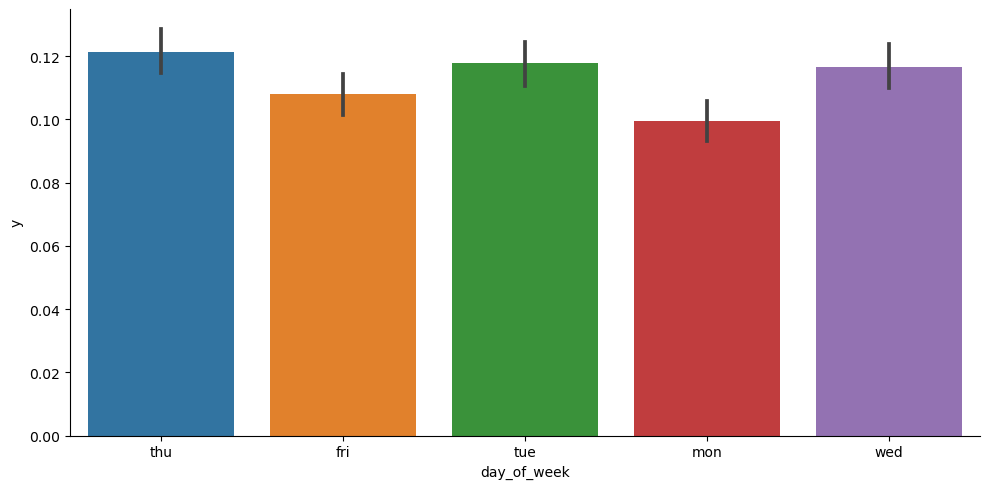

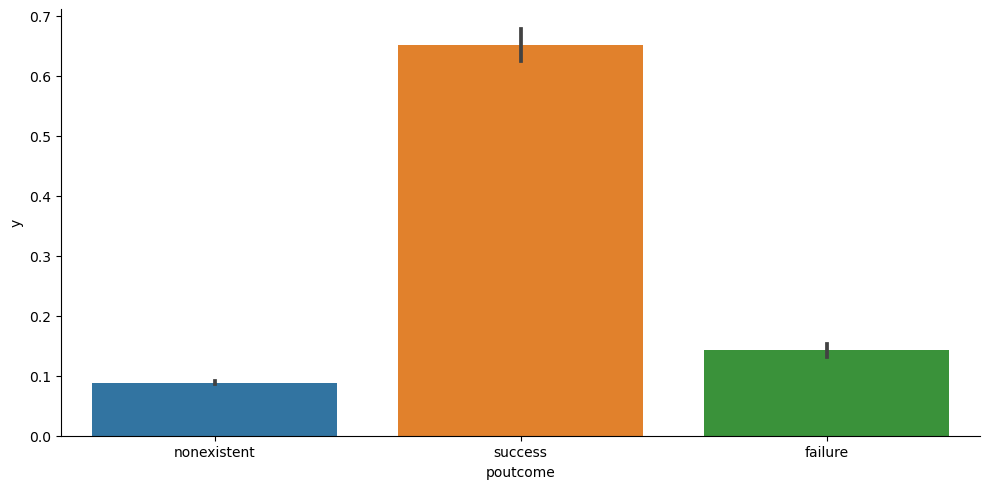

In [398]:
for var in cat_cols:
    if data[var].dtype == 'object':
        sns.catplot(x=var, y='y', data=data, kind='bar', height=5, aspect=2)
    else:
        sns.catplot(x='y', y=var, data=data, kind='bar', height=5, aspect=2)

In [399]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_conf_idx', 'y'],
      dtype='object')

## EDA Multivariate Analysis 

<AxesSubplot:>

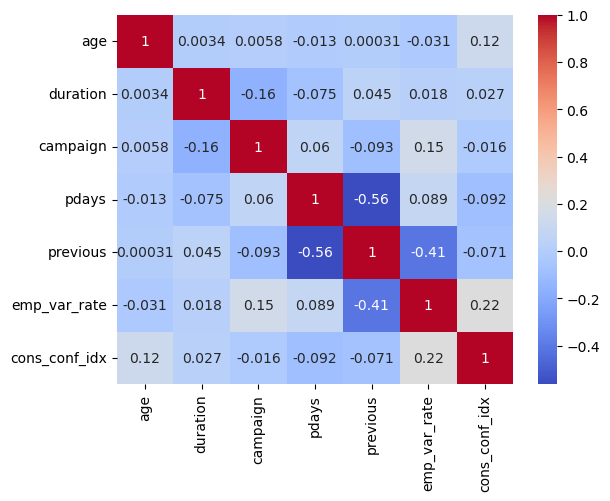

In [400]:
# Define the columns to include in the heatmap
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_conf_idx']

# Create a correlation matrix
corr_matrix = data[cols].corr()

# Generate the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [401]:
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate     13498
cons_conf_idx        0
y                    0
dtype: int64

## Impute Missing values 

Here initially we dont have null values in our data. But after log transformation we got null values beacuese it's possible that some of the data points are negative, or equal to zero, and taking the logarithm of a negative number or zero is undefined in the real numbers. In this case, the result of the transformation will be a NaN (not a number) value.

In [402]:
# Impute missing values with mean
data.fillna(data.mean(), inplace=True)

In [403]:
data.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
emp_var_rate     0
cons_conf_idx    0
y                0
dtype: int64

# Conclusion

We conducted an end-to-end exploratory data analysis (EDA) of a Portuguese banking institution dataset containing 21 columns and 41,188 rows of data. The dataset did not have any null values or missing data.

Among the 21 columns, there were no missing values. Five out of 21 columns were float, six out of 21 columns were integers, and the remaining ten were object types.

We used the z-score method to detect and remove outliers. Next, we printed a correlation matrix using a heatmap and removed the columns 'cons_price_idx', 'euribor3m', and 'nr_employed' as they had high correlation with 'emp_var_rate'.

We also printed a statistical summary of the data using the 'describe().T' function, and conducted univariate analysis for both numeric and categorical types. We then performed data transformation by addressing skewness and using log transformation.

Bivariate analysis was conducted for both numeric and categorical data, and multivariate analysis was performed with the help of a heatmap.

We imputed the missing values of 'emp_var_rate' with the mean value.

In summary, we conducted a comprehensive end-to-end EDA of the dataset by checking for missing values, removing outliers, analyzing correlation, and performing data transformation. We also conducted univariate, bivariate, and multivariate analysis, and imputed missing values where necessary. This analysis helped us to gain insights into the data and identify any issues or patterns that may impact our analysis.